In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
vims_wave = np.loadtxt('vims_wave.txt')
new_array = ['_0405','_0607','_0809','_1011','_1213','_1415','_1617']
for number in new_array:
    new_string = 'df'+number+' = '+'pd.read_pickle("data/data'+number+'.pkl")'
    exec(new_string)

In [3]:
def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

band_channels = [29,30,31,32,33,34,46,47,48,49,50,51,52,53,54,55,56,57,58,59,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,102,103,104,105]

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_fit = powerlaw(vims_wave,*my_fit)
    return final_fit

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra

In [4]:
spectra_list = []
for number in new_array:
    new_string = 'spectra'+number+' = '+'custom_fit(df'+number+')'
    exec(new_string)
    spectrum = 'spectra'+number
    new_spectrum = locals()[spectrum]
    spectra_list.append(new_spectrum)


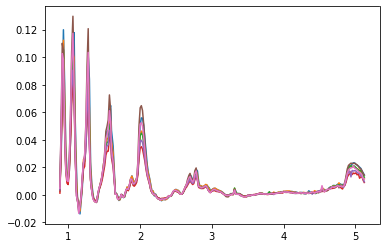

In [5]:
%matplotlib inline
x = vims_wave
for spectrum in spectra_list:
    plt.plot(x,spectrum)
plt.show()

In [6]:
micron = list(range(56,81))

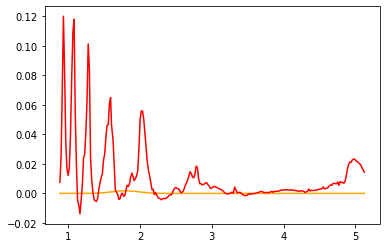

In [7]:
%matplotlib inline
x = vims_wave
y = spectra_0405

my_fit,_ = curve_fit(gaussian,x[band_channels],y[band_channels],maxfev=2000)

plt.plot(x,gaussian(x,*my_fit),'orange')
plt.plot(x,y,'r')
plt.show()

In [8]:
new_list = np.sort(band_channels+list(range(60,77)))

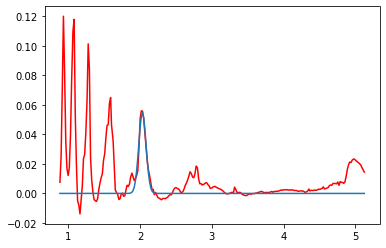

In [16]:
%matplotlib inline
x = vims_wave
y = spectra_0405

my_fit,_ = curve_fit(gaussian,x[new_list],y[new_list],maxfev=2000)

plt.plot(x,y,c='r')
plt.plot(x,gaussian(x,*my_fit))
plt.show()

In [31]:
window = list(range(56,82))
mean_v = np.average([x[68:69]])

In [61]:
np.shape(my_s)

()

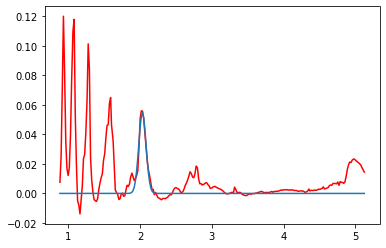

In [73]:
%matplotlib inline
x = vims_wave
y = spectra_0405

mean = np.average(x[68:69])
my_s = mean-x[56]

my_fit,_ = curve_fit(gaussian,x[new_list],y[new_list])

plt.plot(x,y,c='r')
plt.plot(x,gaussian(x,*my_fit))
plt.show()

In [65]:
print(*my_fit)

0.05464337118006799 2.033169429896161 0.05052095398876772


In [72]:
np.shape(spectra_0405)

(256,)